# mse budget

Developent of mse

$\frac{1}{2} \hat{\frac{\delta {h ^ \prime} ^2}{\delta t}} = \hat{h^ \prime} \ \text{NetLW} ^ \prime + \hat{h^ \prime} \ \text{SEF} ^ \prime + \hat{h^ \prime} \ \text{NetSW} ^ \prime - \hat{h^ \prime} \ \nabla_{h}\cdot \hat{\overrightarrow{u}h}$


In [40]:
import xarray as xr

import numpy as np
import skimage.measure as skm
import scipy
import pandas as pd

import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeat

import os
from cmip6_metrics.funcs.vars.myPlots import *

In [41]:
model='MPI-ESM1-2-HR'
experiment_id='historical'

## tMean

### variables

In [42]:
# mse
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_mse_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
mse = ds.mse
mse_tMean = mse.mean(dim=('time'))
weights = np.cos(np.deg2rad(ds.lat))
mse_sMean = mse_tMean.weighted(weights).mean(dim=('lat','lon'))
mse_anom = mse_tMean - mse_sMean

mse_anomSqrd = mse_anom**2
mse_var = mse_anomSqrd.mean(dim=('lat','lon'))


del ds, mse

In [43]:
# LW
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_netlw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
netlw = ds.netlw
netlw_tMean = netlw.mean(dim=('time'))
netlw_sMean = netlw_tMean.weighted(weights).mean(dim=('lat','lon'))
netlw_anom = netlw_tMean - netlw_sMean

netlw_corr = mse_anom.data * netlw_anom.data
netlw_corr = xr.DataArray(
    data=netlw_corr,
    dims=['lat', 'lon'],
    coords={'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )

del ds, netlw

In [44]:
# SEF
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_netsef_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
netsef = ds.netsef
netsef_tMean = netsef.mean(dim=('time'))
netsef_sMean = netsef_tMean.weighted(weights).mean(dim=('lat','lon'))
netsef_anom = netsef_tMean - netsef_sMean

netsef_corr = mse_anom.data * netsef_anom.data
netsef_corr = xr.DataArray(
    data=netsef_corr,
    dims=['lat', 'lon'],
    coords={'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )

del ds, netsef

In [45]:
# SW
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_netsw_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
netsw = ds.netsw
netsw_tMean = netsw.mean(dim=('time'))
netsw_sMean = netsw_tMean.weighted(weights).mean(dim=('lat','lon'))
netsw_anom = netsw_tMean - netsw_sMean

netsw_corr = mse_anom.data * netsw_anom.data
netsw_corr = xr.DataArray(
    data=netsw_corr,
    dims=['lat', 'lon'],
    coords={'lat': mse_anom.lat.data, 'lon': mse_anom.lon.data},
    attrs={'units':''}
    )

del ds, netsw

In [46]:
# ADV
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_adv_tMean_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
adv_tMean = ds.adv_tMean
adv_corr = mse_anom * adv_tMean

### plot

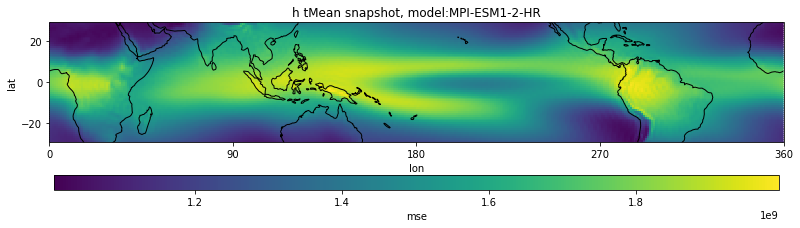

In [47]:
plot_snapshot(mse_tMean, 'viridis', 'h tMean', model)

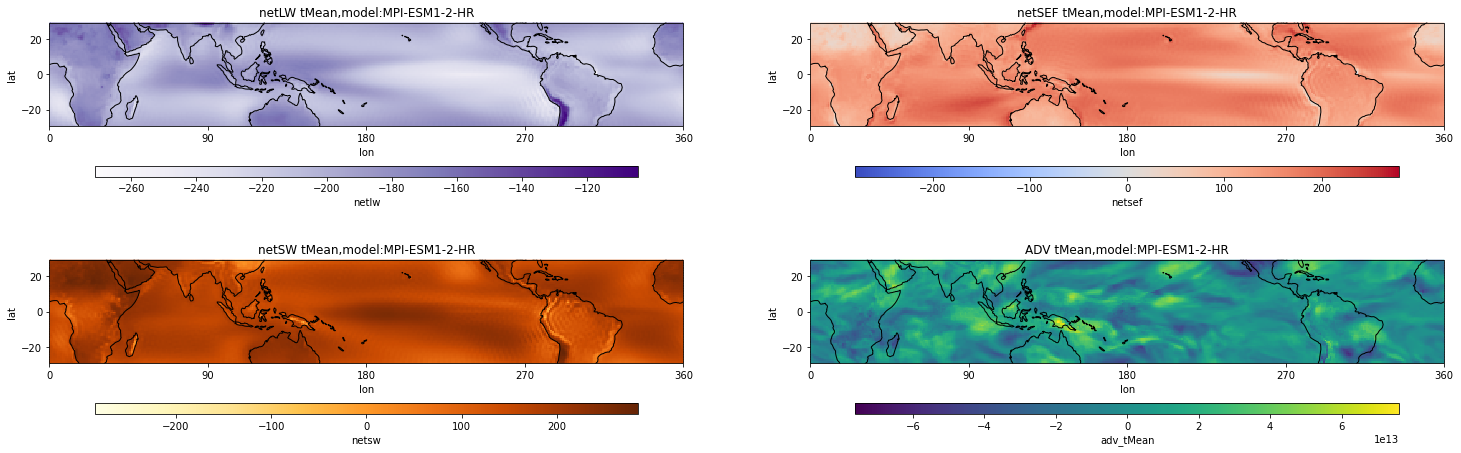

In [48]:
# tMean
projection = ccrs.PlateCarree(central_longitude=180)
f, ax = plt.subplots(nrows = 2, ncols=2, subplot_kw=dict(projection=projection), figsize=(25, 8))
plot_axMap(ax[0][0], netlw_tMean, 'Purples', 'netLW tMean', model)
plot_axMap(ax[0][1], netsef_tMean, 'coolwarm', 'netSEF tMean', model)
plot_axMap(ax[1][0], netsw_tMean, 'YlOrBr', 'netSW tMean', model)
plot_axMap(ax[1][1], adv_tMean, 'viridis', 'ADV tMean', model)

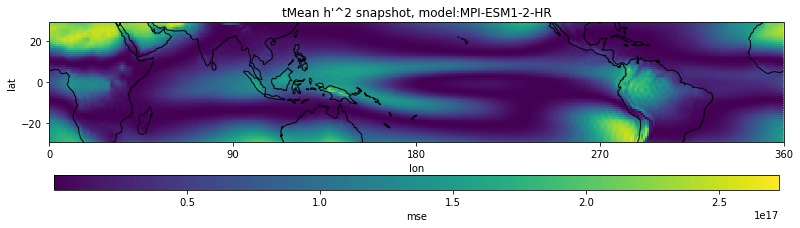

In [49]:
# tMean squared anomaly
plot_snapshot(mse_anomSqrd, 'viridis', 'tMean h\'^2', model)


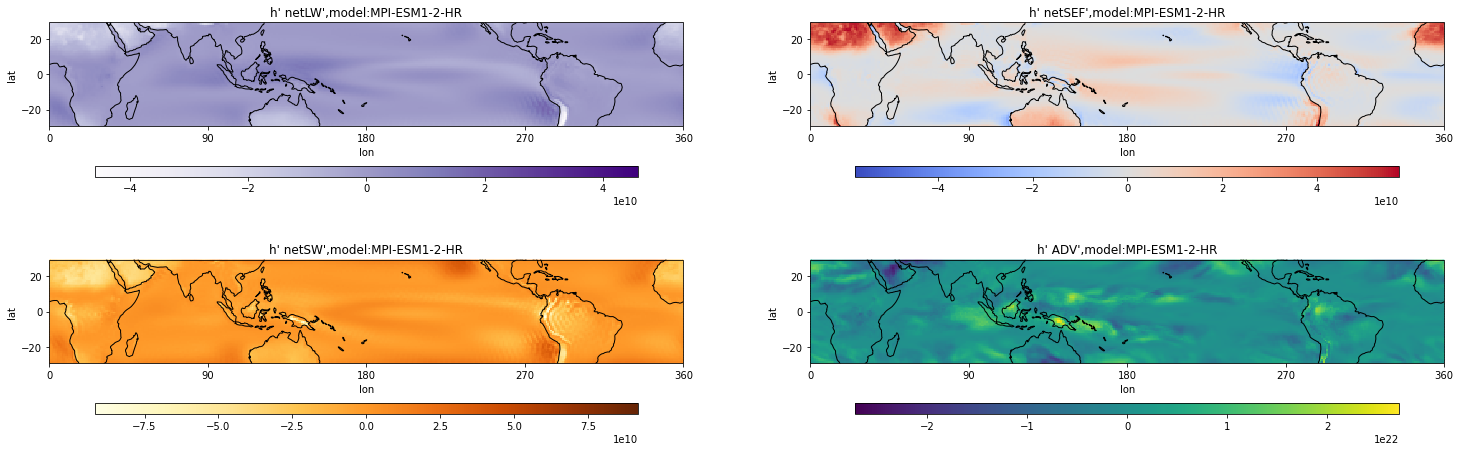

In [50]:
# tMean correlation terms
projection = ccrs.PlateCarree(central_longitude=180)
f, ax = plt.subplots(nrows = 2, ncols=2, subplot_kw=dict(projection=projection), figsize=(25, 8))
plot_axMap(ax[0][0], netlw_corr, 'Purples', 'h\' netLW\'', model)
plot_axMap(ax[0][1], netsef_corr, 'coolwarm', 'h\' netSEF\'', model)
plot_axMap(ax[1][0], netsw_corr, 'YlOrBr', 'h\' netSW\'', model)
plot_axMap(ax[1][1], adv_corr, 'viridis', 'h\' ADV\'', model)

## Variance

In [51]:
folder = '/Users/cbla0002/Documents/data/cmip6/' + model
fileName = model + '_mse_' + experiment_id + '.nc'
path = folder + '/' + fileName
ds = xr.open_dataset(path)
mse = ds.mse
mse_sMean = mse.weighted(weights).mean(dim=('lat','lon'))
mse_anom = mse_tMean - mse_sMean

mse_anomSqrd = mse_anom**2
mse_var = mse_anomSqrd.mean(dim=('lat','lon'))

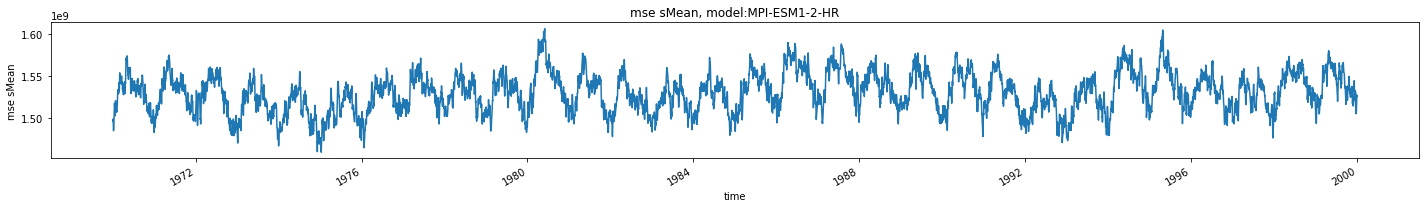

In [52]:
plot_timeseries(mse_sMean, 'mse sMean', model)

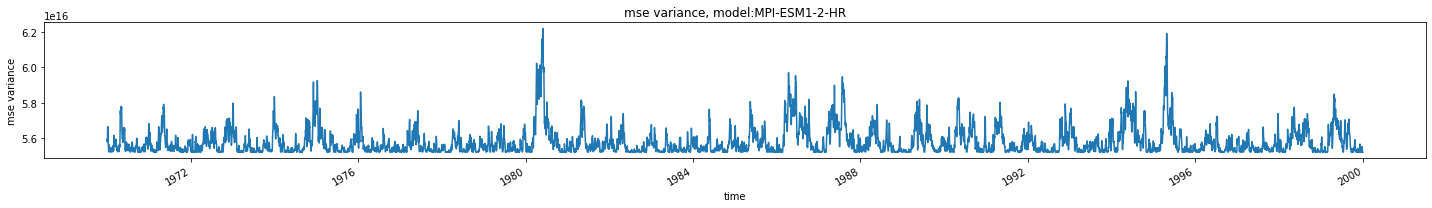

In [53]:
plot_timeseries(mse_var, 'mse variance', model)

### annual

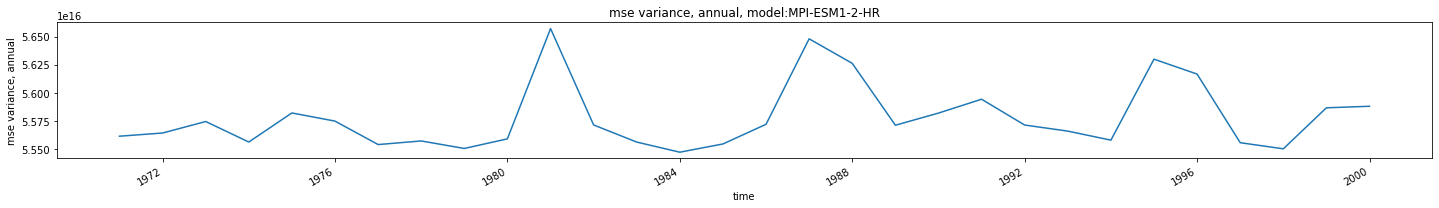

In [56]:
plot_timeseries(mse_var.resample(time='Y').mean(dim='time'), 'mse variance, annual', model)

### seasonal / monthly

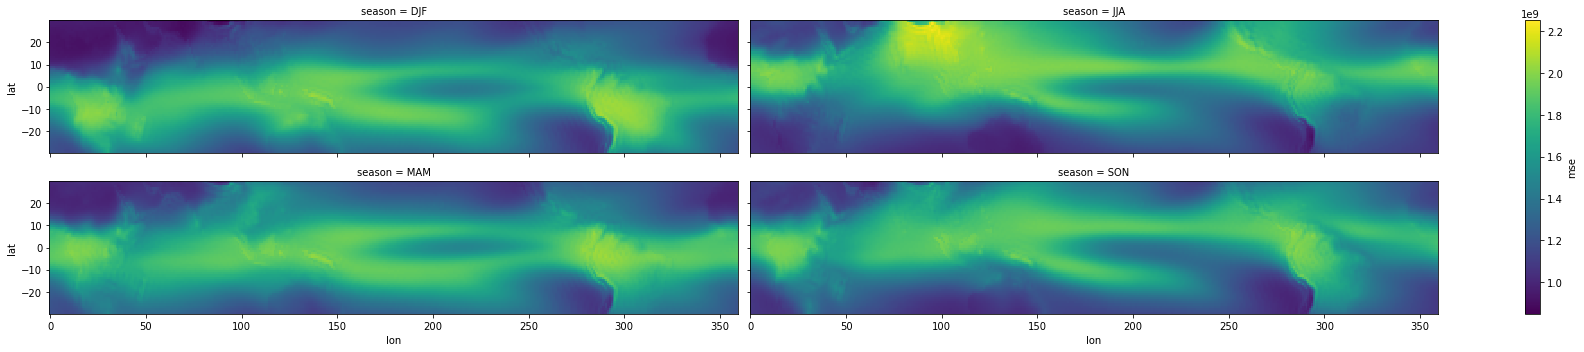

In [106]:
mse.groupby('time.season').mean(dim='time').plot(col='season', col_wrap=2, figsize = (25,5))

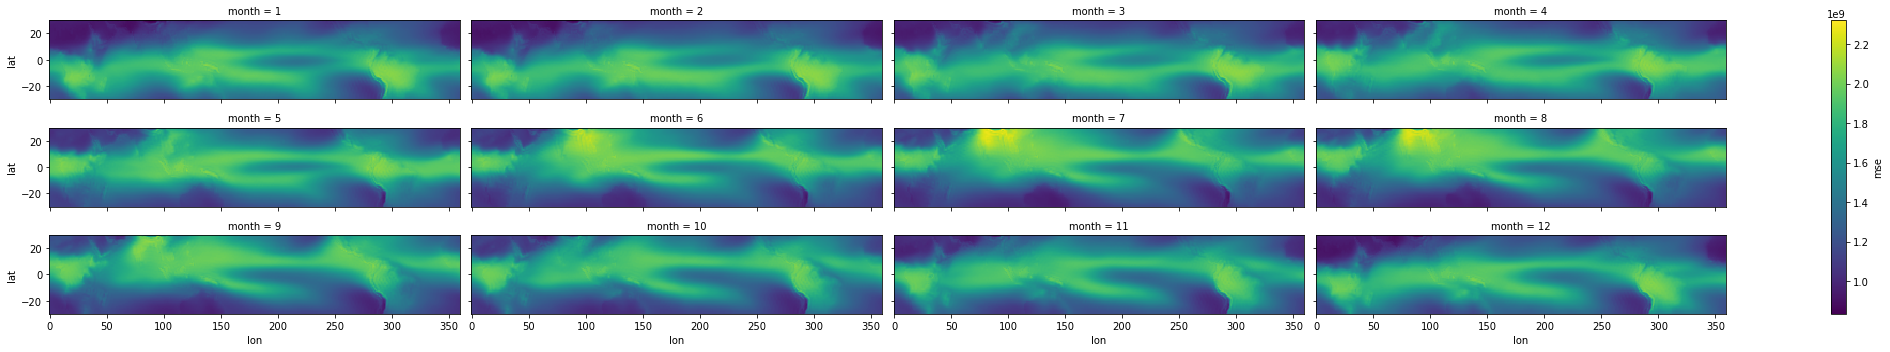

In [75]:
mse_monthly = mse.groupby('time.month').mean(dim ='time')
mse.groupby('time.month').mean(dim ='time').plot(col='month', col_wrap=4, figsize = (30,5))

Text(0.5, 1.0, 'monthly mean mse')

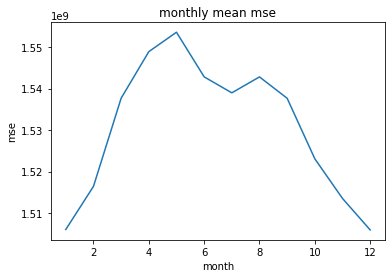

In [107]:
mse_monthly.weighted(weights).mean(dim=('lat','lon')).plot()
plt.title('monthly mean mse')

Text(0.5, 1.0, 'monthly variance of mse')

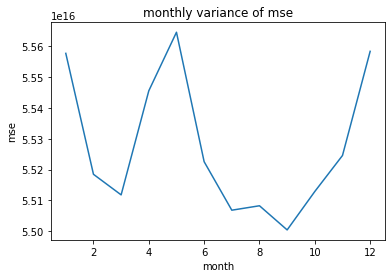

In [111]:
mse_anomSqrd.groupby('time.month').mean(dim ='time').weighted(weights).mean(dim=('lat','lon')).plot()
plt.title('monthly variance of mse')

In [90]:
# resample and plot the development of the months
def to_monthly(ds):
    year = ds.time.dt.year
    month = ds.time.dt.month

    # assign new coords
    ds = ds.assign_coords(year=("time", year.data), month=("time", month.data))

    # reshape the array to (..., "month", "year")
    return ds.set_index(time=("year", "month")).unstack("time")  


# for month_id, ds_month in ds.groupby('time.month'):
#     print(month_id, ds_month)

In [95]:
mse_month = mse_var.resample(time='m').mean(dim='time')
mse_month = to_monthly(mse_month)
np.shape(mse_month)

(30, 12)

Text(0.5, 1.0, 'mse by month')

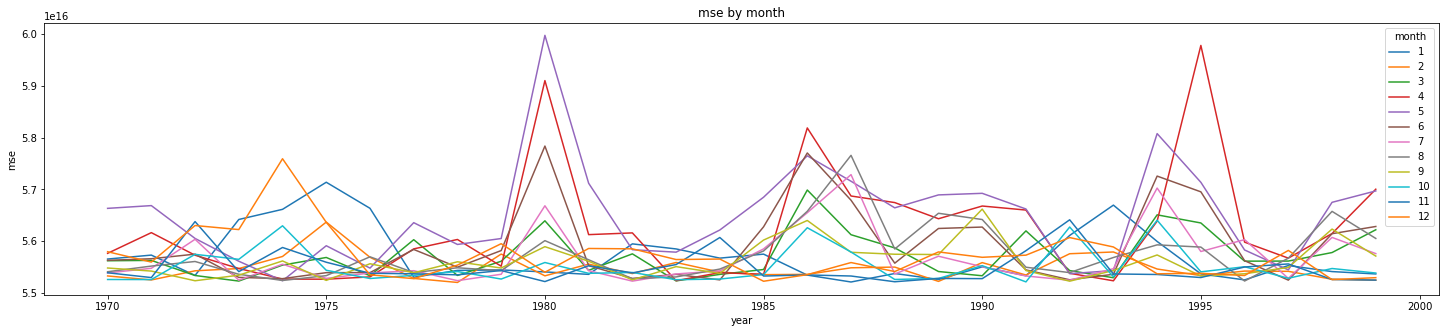

In [102]:
mse_month.plot(x='year', hue='month', figsize=(25,5))
plt.title('mse by month')